# Ordering of Trotter terms

In [2]:
## import necessary packages
import random
import numpy as np
from numpy.linalg import matrix_power
from scipy.linalg import expm

import matplotlib.pyplot as plt

from lattice_hamiltonians import *

import jax
from jax import numpy as jnp
print('jax.device:', jax.devices())

jax.device: [CpuDevice(id=0)]


### Compare commutators of tow groups

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIIIIII', 'IXXIIIIIII', 'IIXXIIIIII', 'IIIXXIIIII', 'IIIIXXIIII', 'IIIIIXXIII', 'IIIIIIXXII', 'IIIIIIIXXI', 'IIIIIIIIXX', 'XIIIIIIIIX']
inter_yy: ['YYIIIIIIII', 'IYYIIIIIII', 'IIYYIIIIII', 'IIIYYIIIII', 'IIIIYYIIII', 'IIIIIYYIII', 'IIIIIIYYII', 'IIIIIIIYYI', 'IIIIIIIIYY', 'YIIIIIIIIY']
inter_zz: ['ZZIIIIIIII', 'IZZIIIIIII', 'IIZZIIIIII', 'IIIZZIIIII', 'IIIIZZIIII', 'IIIIIZZIII', 'IIIIIIZZII', 'IIIIIIIZZI', 'IIIIIIIIZZ', 'ZIIIIIIIIZ']
external ['ZIIIIIIIII', 'IZIIIIIIII', 'IIZIIIIIII', 'IIIZIIIIII', 'IIIIZIIIII', 'IIIIIZIIII', 'IIIIIIZIII', 'IIIIIIIZII', 'IIIIIIIIZI', 'IIIIIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIIIIII', 'IIXXIIIIII', 'IIIIXXIIII', 'IIIIIIXXII', 'IIIIIIIIXX']
inter_xx_odd: ['IXXIIIIIII', 'IIIXXIIIII', 'IIIIIXXIII', 'IIIIIIIXXI', 'XIIIIIIIIX']
external_even ['ZIIIIIIIII', 'IIZIIIIIII', 'IIIIZIIIII', 'IIIIIIZIII', 'IIIIIIIIZI']
external_odd ['IZIIIIIIII', 'IIIZIIIIII', 'IIIIIZIIII', 'I

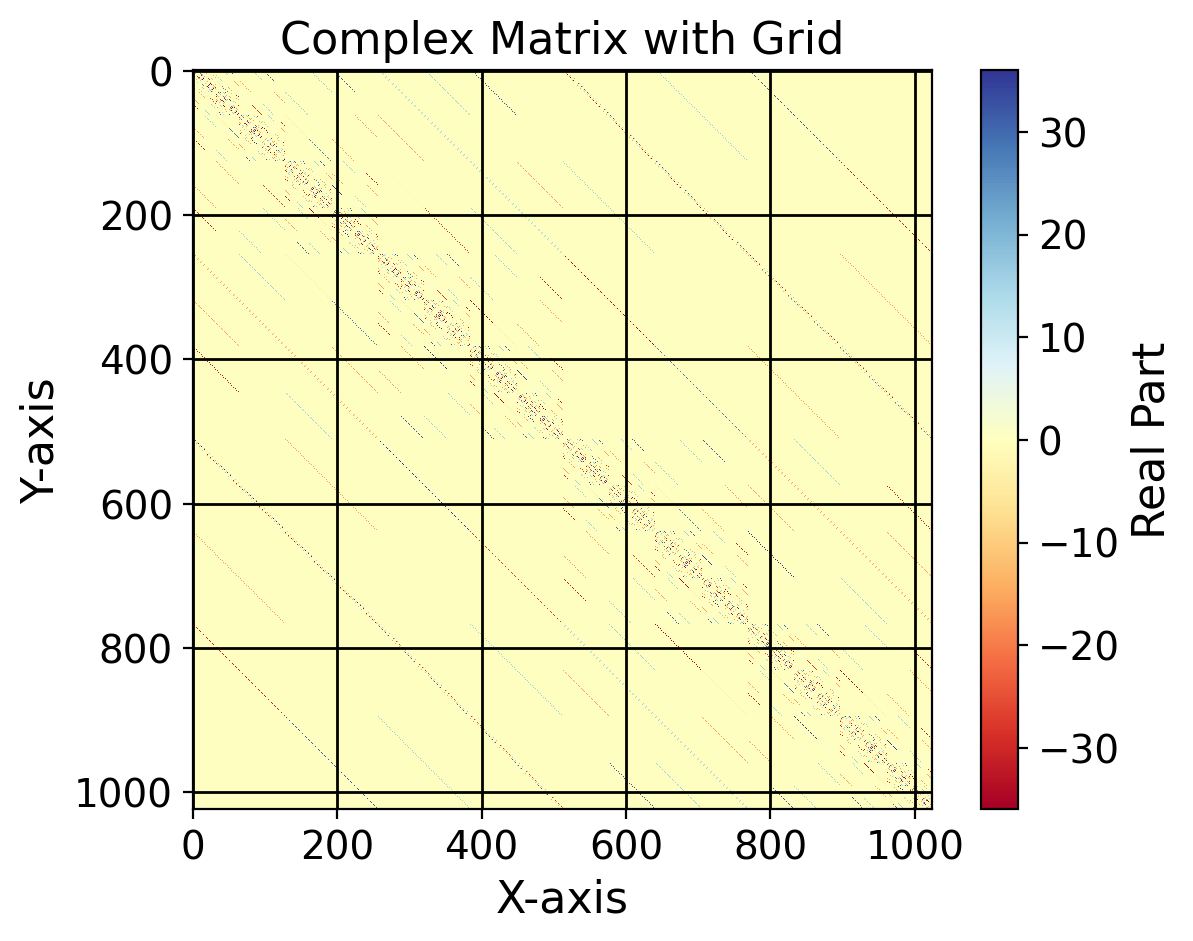

In [4]:
n_qubit = 10
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
xyz_group = [heisenberg.xx , heisenberg.yy, heisenberg.zz]
# xyz_group = [heisenberg.xx , heisenberg.yy, heisenberg.zz + heisenberg.z]

R_parity = commutator(parity_group[0], parity_group[1])
R_xyz = commutator(xyz_group[0], xyz_group[1]) + commutator(xyz_group[1], xyz_group[2]) + commutator(xyz_group[2], xyz_group[0])
# print(R_parity)
# print(R_xyz)
# print(R_xyz - R_parity)

matrix_plot(R_xyz - R_parity)

In [6]:
print(tight_bound(xyz_group, 1, 10, 10000))
print(tight_bound(parity_group, 1, 10, 10000))

1.2533562443354052
0.9680879277735214


### Compare even/odd grouping and XYZ grouping

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'XIIIIIIX']
inter_yy: ['YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'YIIIIIIY']
inter_zz: ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'ZIIIIIIZ']
external ['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIIII', 'IIXXIIII', 'IIIIXXII', 'IIIIIIXX']
inter_xx_odd: ['IXXIIIII', 'IIIXXIII', 'IIIIIXXI', 'XIIIIIIX']
external_even ['ZIIIIIII', 'IIZIIIII', 'IIIIZIII', 'IIIIIIZI']
external_odd ['IZIIIIII', 'IIIZIIII', 'IIIIIZII', 'IIIIIIIZ']
len perm_list:  2
len perm_list:  6


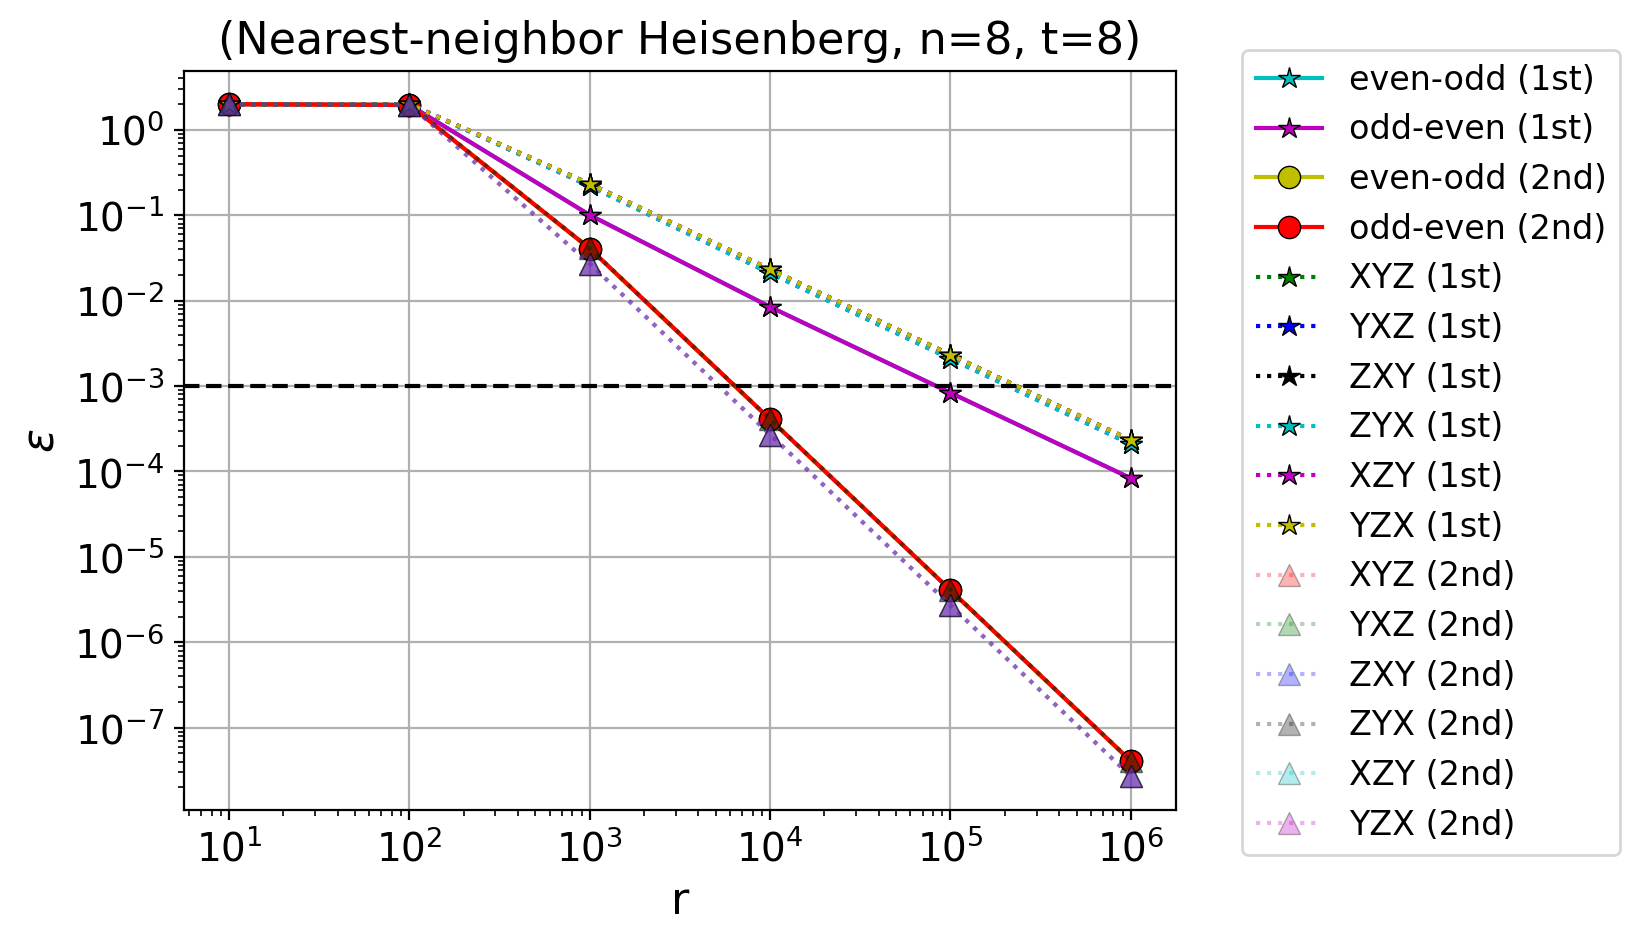

In [74]:
n_qubit = 8; epsilon = 0.001
# time = 5
time = n_qubit 
heisenberg = ham.heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
r_list = np.logspace(1, 6, num=6, dtype=int)
parity_label = ['even-odd', 'odd-even']; parity_markers = ['*:', '.-']

# plot_trotter_error_vs_r(epsilon, parity_group, r_list, parity_label, parity_markers, plot=True)

trotter_error_list, trotter_error_list_2nd = utils.trotter_error(parity_group, r_list, time)
for i in range(len(trotter_error_list[0])):
    utils.data_plot(r_list, trotter_error_list[:,i], '*-', label=parity_label[i] + ' (1st)')
    # utils.data_plot(r_list, trotter_error_list[:,i], parity_markers[i], label=parity_label[i] + ' (1st)')

for i in range(len(trotter_error_list_2nd[0])):
    utils.data_plot(r_list, trotter_error_list_2nd[:,i], 'o-', label=parity_label[i] + ' (2nd)')

xyz_group = [heisenberg.xx, heisenberg.yy, heisenberg.zz + heisenberg.z]
xyz_label = ['XYZ', 'YXZ', 'ZXY', 'ZYX', 'XZY', 'YZX'] 
trotter_error_list, trotter_error_list_2nd = utils.trotter_error(xyz_group, r_list, time)
for i in range(len(trotter_error_list[0])):
    utils.data_plot(r_list, trotter_error_list[:,i], '*:', label=xyz_label[i] + ' (1st)')
    # plt.plot(r_list, trotter_error_list[:,i], '-', markeredgecolor='black', label='order/group: ' + xyz_label[i] + ' (1st order)', alpha=0.6)

for i in range(len(trotter_error_list_2nd[0])):
    utils.data_plot(r_list, trotter_error_list_2nd[:,i], '^:', label=xyz_label[i] + ' (2nd)', alpha=0.3)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'$\epsilon$')
plt.title(rf'(Nearest-neighbor Heisenberg, n={n_qubit}, t={time})')
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIII', 'IXXIII', 'IIXXII', 'IIIXXI', 'IIIIXX', 'XIIIIX']
inter_yy: ['YYIIII', 'IYYIII', 'IIYYII', 'IIIYYI', 'IIIIYY', 'YIIIIY']
inter_zz: ['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'ZIIIIZ']
external ['ZIIIII', 'IZIIII', 'IIZIII', 'IIIZII', 'IIIIZI', 'IIIIIZ']
[     10     100    1000   10000  100000 1000000]
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIII', 'IIXXII', 'IIIIXX']
inter_xx_odd: ['IXXIII', 'IIIXXI', 'XIIIIX']
external_even ['ZIIIII', 'IIZIII', 'IIIIZI']
external_odd ['IZIIII', 'IIIZII', 'IIIIIZ']
len perm_list:  2
number of terms:  24
# selected perm:  50


Text(0.5, 1.0, 'Nearest-neighbor Heisenberg, n=6, t=6, L=16')

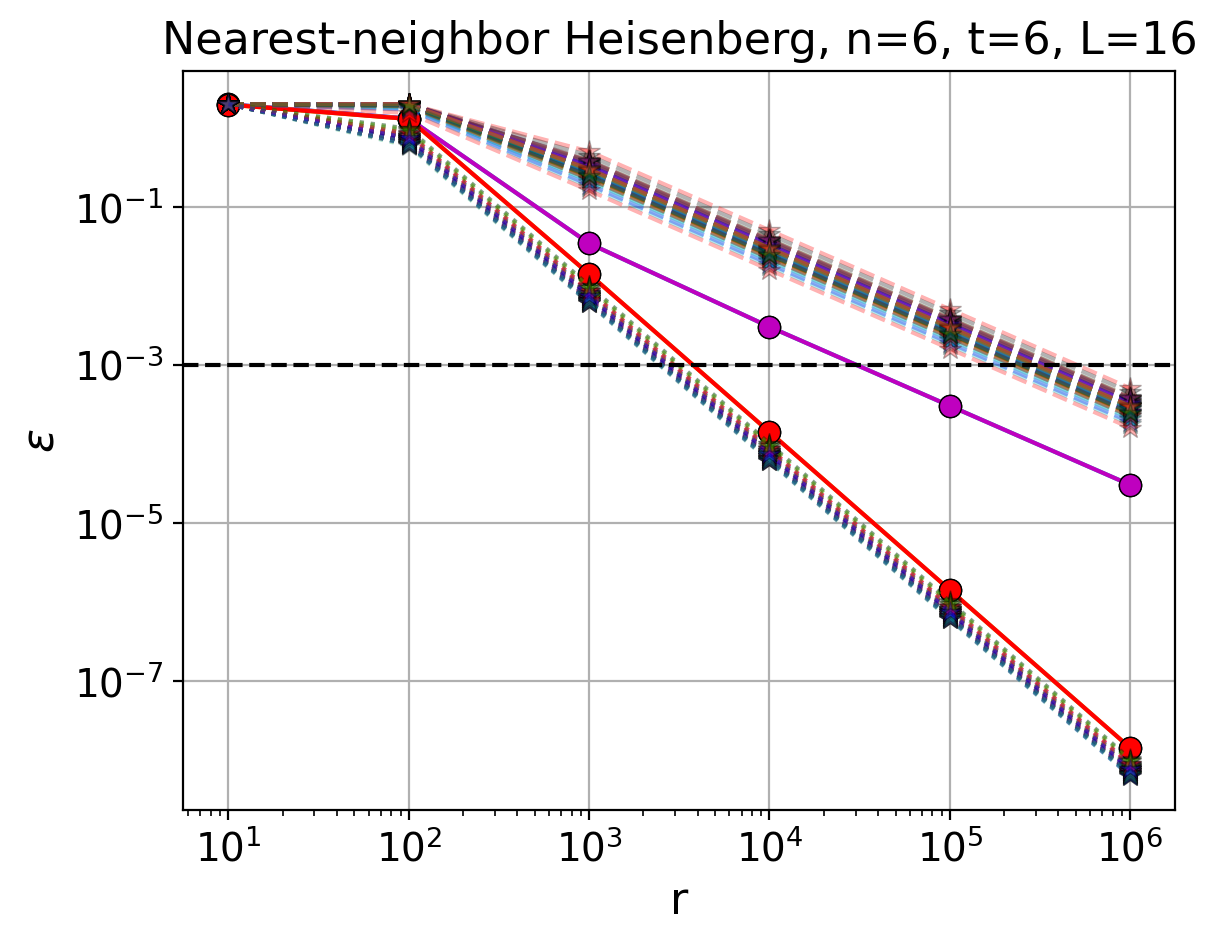

In [109]:
from qiskit.quantum_info.operators import Operator, Pauli

n_qubit = 6; epsilon = 0.001
Jx = 2.0; Jy = 2.0; Jz = 2.0; h = 0.5
# time = 5
time = n_qubit
# print('time: ', time)
heisenberg = ham.heisenberg_1d(n=n_qubit, Jx=Jx, Jy=Jy, Jz=Jz, h=h, verbose=True)
# term_list = np.array([heisenberg.inter_xx, heisenberg.inter_yy, heisenberg.inter_zz, heisenberg.external]).flatten()
# term_list = ['XXI', 'IXX', 'YYI', 'IYY', 'ZZI', 'IZZ', 'ZII', 'IZI', 'IIZ']
# term_list = ['XXI', 'IXX', 'YYI', 'IYY', 'ZZI', 'IZZ', 'ZII', 'IZI', 'IIZ']
# term_list = ['XXI', 'IXX', 'YYI', 'IYY', 'ZZI', 'IZZ']
# term_list = ['XXI', 'IXX', 'YYI', 'IYY', 'ZZI' 'IZZ', 'ZII' 'IZI' 'IIZ']
# term_list = ['XX', 'YY', 'ZZ']
# term_list = ['XX', 'YY', 'ZZ', 'IZ', 'ZI']
# L = len(term_list)
# print('L= ', term_list)
# ham_list = [Operator(Pauli(item)) for item in term_list]
ham_list = [Jx * Operator(Pauli(item)) for item in heisenberg.inter_xx] + [Jy * Operator(Pauli(item)) for item in heisenberg.inter_yy] + [Jz * Operator(Pauli(item)) for item in heisenberg.inter_zz] + [h * Operator(Pauli(item)) for item in heisenberg.external]
# print(ham_list)
r_list = np.logspace(1, 6, num=6, dtype=int)
print(r_list)

heisenberg.partition(method='parity', verbose=True)
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
parity_label = ['even-odd', 'odd-even']; parity_markers = ['*:', '.-']

# plot_trotter_error_vs_r(epsilon, parity_group, r_list, parity_label, parity_markers, plot=True)

parity_trotter_error_list, parity_trotter_error_list_2nd = utils.trotter_error(parity_group, r_list, time)
for i in range(len(parity_trotter_error_list[0])):
    utils.data_plot(r_list, parity_trotter_error_list[:,i], 'o-', label=parity_label[i] + ' (1st)')
    # utils.data_plot(r_list, trotter_error_list[:,i], parity_markers[i], label=parity_label[i] + ' (1st)')

for i in range(len(parity_trotter_error_list_2nd[0])):
    utils.data_plot(r_list, parity_trotter_error_list_2nd[:,i], 'o-', label=parity_label[i] + ' (2nd)')


trotter_error_list, trotter_error_list_2nd = utils.trotter_error(ham_list, r_list, time)
# print(len(perm_list))
# print(trotter_error_list)
for i in range(len(trotter_error_list[0])):
    # if i % 10 == 0: print(i)
    utils.data_plot(r_list, trotter_error_list[:,i], '*--', label=' (1st)', alpha=0.3)

for i in range(len(trotter_error_list_2nd[0])):
    # if i % 10 == 0: print(i)
    utils.data_plot(r_list, trotter_error_list_2nd[:,i], '*:', label=' (1st)', alpha=0.3)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'$\epsilon$')
plt.title(f'Nearest-neighbor Heisenberg, n={n_qubit}, t={time}, L={L}')

## Power-law

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIII', 'IXXII', 'IIXXI', 'IIIXX', 'XIIIX']
inter_yy: ['YYIII', 'IYYII', 'IIYYI', 'IIIYY', 'YIIIY']
inter_zz: ['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ', 'ZIIIZ']
external ['ZIIII', 'IZIII', 'IIZII', 'IIIZI', 'IIIIZ']
---------Heisenberg Hamiltonian with Power law decaying interaction (alpha: 4)---------
all_pow_inter:  {'11000': 1, '10100': 2, '10010': 3, '10001': 4, '01100': 1, '01010': 2, '01001': 3, '00110': 1, '00101': 2, '00011': 1}
# all perm:  6


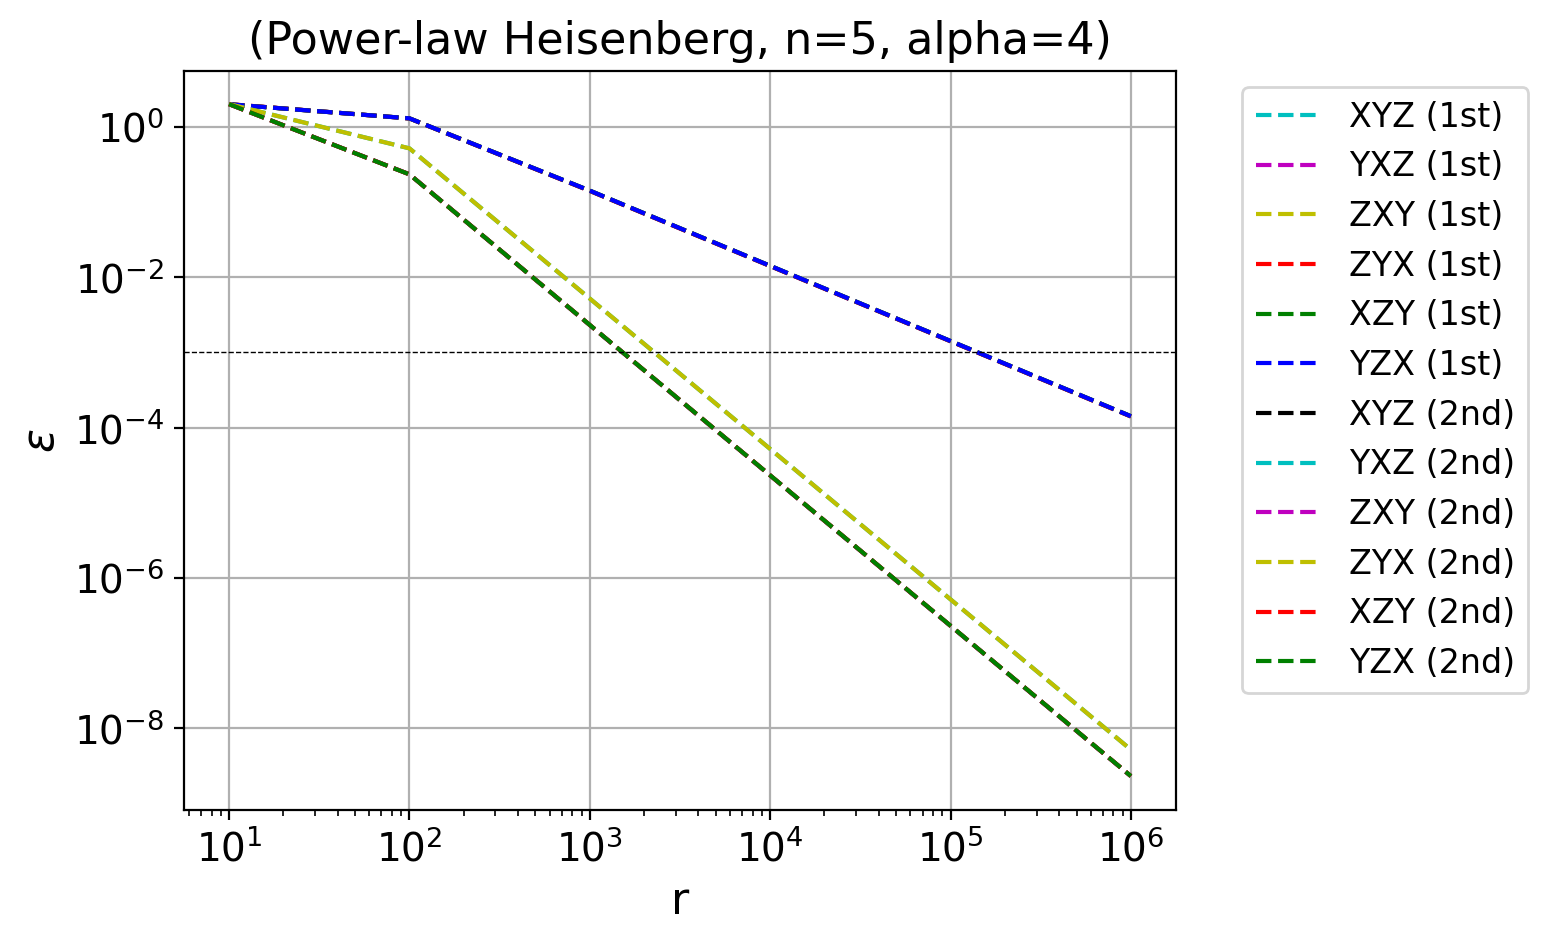

In [16]:
n_qubit = 5; epsilon = 0.001
time = n_qubit * 2
alpha = 4
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.power_law(alpha, verbose=True)
xyz_group = [heisenberg.pow_xx, heisenberg.pow_yy, heisenberg.pow_zz + heisenberg.z]
r_list = np.logspace(1, 6, num=6, dtype=int)
xyz_label = ['XYZ', 'YXZ', 'ZXY', 'ZYX', 'XZY', 'YZX'] 
xyz_markers = ['--', '--', '--', '--', '--', '--']

utils.plot_trotter_error_vs_r(epsilon, time, xyz_group, r_list, xyz_label, xyz_markers, plot=True, locate=False)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'$\epsilon$')
plt.title(rf'(Power-law Heisenberg, n={n_qubit}, alpha={alpha})')
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')